In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
from pyqg_generative.models.parameterization import *
import pyqg_subgrid_experiments as pse

/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/pp2681/pyqg_experiments/pyqg_subgrid_experiments/__init__.py:19: UserWarning: Unable to load differentiable_parameterizations, install autograd if you want to use these
  warnings.warn("Unable to load differentiable_parameterizations, install autograd if you want to use these")


# Offline scores

In [2]:
def get_offline_test_transfer(folder='/scratch/pp2681/pyqg_generative/', exp='lowres'):
    ds1 = xr.open_dataset(os.path.join(folder, exp, 'offline_test.nc'), decode_times=False)
    ds1['time'] = ds1['time'] / 24 / 360 # hours to years
    ds2 = xr.open_dataset(os.path.join(folder, exp, 'offline_transfer.nc'), decode_times=False)
    ds2['time'] = ds2['time'] / 24 / 360
    return ds1, ds2

In [3]:
def offline_metrics(exp, folder='/scratch/pp2681/pyqg_generative/'):
    test, transfer = get_offline_test_transfer(exp=exp, folder=folder)
    
    print('Eddy dataset metrics:')
    print('R squared in mean prediction:', float(test.R2_mean))
    print('R squared in power spectrum of subgrid forcing:', float(test.R2_total))
    print('R squared in power spectrum of residuals of subgrid forcing:', float(test.R2_residual))
    
    print('Jet dataset metrics:')
    print('R squared in mean prediction:', float(transfer.R2_mean))
    print('R squared in power spectrum of subgrid forcing:', float(transfer.R2_total))
    print('R squared in power spectrum of residuals of subgrid forcing:', float(transfer.R2_residual))
    
    plt.figure(constrained_layout=True, figsize=(12,4))
    plt.suptitle('Power spectral density of subgrid forcing')
    plt.subplot(1,2,1)
    for key, label, ls, color in [('PSD', 'Truth', '-', 'k'), 
                       ('PSD_gen', 'generated', '--', 'k'), 
                       ('PSD_mean', 'generated mean', '-', 'g'),
                       ('PSD_res', 'Truth residual' , '-', 'r'),
                       ('PSD_gen_res', 'generated residual' , '--', 'r')]:
        test[key].isel(lev=0).plot(label=label, ls=ls, color=color)
    plt.legend()
    plt.title('Upper Layer')

    plt.subplot(1,2,2)
    for key, label, ls, color in [('PSD', 'Truth', '-', 'k'), 
                       ('PSD_gen', 'generated', '--', 'k'), 
                       ('PSD_mean', 'generated mean', '-', 'g'),
                       ('PSD_res', 'Truth residual' , '-', 'r'),
                       ('PSD_gen_res', 'generated residual' , '--', 'r')]:
        test[key].isel(lev=1).plot(label=label, ls=ls, color=color)
    plt.legend()
    plt.title('Lower Layer')
    
    plt.figure(constrained_layout=True, figsize=(12,4))
    plt.suptitle('Power spectral density TRANSFER')
    plt.subplot(1,2,1)
    for key, label, ls, color in [('PSD', 'Truth', '-', 'k'), 
                       ('PSD_gen', 'generated', '--', 'k'), 
                       ('PSD_mean', 'generated mean', '-', 'g'),
                       ('PSD_res', 'Truth residual' , '-', 'r'),
                       ('PSD_gen_res', 'generated residual' , '--', 'r')]:
        transfer[key].isel(lev=0).plot(label=label, ls=ls, color=color)
    plt.legend()
    plt.title('Upper Layer')

    plt.subplot(1,2,2)
    for key, label, ls, color in [('PSD', 'Truth', '-', 'k'), 
                       ('PSD_gen', 'generated', '--', 'k'), 
                       ('PSD_mean', 'generated mean', '-', 'g'),
                       ('PSD_res', 'Truth residual' , '-', 'r'),
                       ('PSD_gen_res', 'generated residual' , '--', 'r')]:
        transfer[key].isel(lev=1).plot(label=label, ls=ls, color=color)
    plt.legend()
    plt.title('Lower Layer')
    
    # Energy redistribution
    plt.figure(constrained_layout=True, figsize=(12,4))
    plt.suptitle('Energy contribution spectrum')
    plt.subplot(1,2,1)
    for key, label, ls, color in [('Eflux', 'Truth', '-', 'k'), 
                       ('Eflux_gen', 'generated', '--', 'k'), 
                       ('Eflux_mean', 'generated mean', '-', 'g'),
                       ('Eflux_res', 'Truth residual' , '-', 'r'),
                       ('Eflux_gen_res', 'generated residual' , '--', 'r')]:
        test[key].isel(lev=0).plot(label=label, ls=ls, color=color, xscale='log')
    plt.legend()
    plt.title('Upper Layer')

    plt.subplot(1,2,2)
    for key, label, ls, color in [('Eflux', 'Truth', '-', 'k'), 
                       ('Eflux_gen', 'generated', '--', 'k'), 
                       ('Eflux_mean', 'generated mean', '-', 'g'),
                       ('Eflux_res', 'Truth residual' , '-', 'r'),
                       ('Eflux_gen_res', 'generated residual' , '--', 'r')]:
        test[key].isel(lev=1).plot(label=label, ls=ls, color=color, xscale='log')
    plt.legend()
    plt.title('Lower Layer')
    
    plt.figure(constrained_layout=True, figsize=(12,4))
    plt.suptitle('Energy contribution spectrum TRANSFER')
    plt.subplot(1,2,1)
    for key, label, ls, color in [('Eflux', 'Truth', '-', 'k'), 
                       ('Eflux_gen', 'generated', '--', 'k'), 
                       ('Eflux_mean', 'generated mean', '-', 'g'),
                       ('Eflux_res', 'Truth residual' , '-', 'r'),
                       ('Eflux_gen_res', 'generated residual' , '--', 'r')]:
        transfer[key].isel(lev=0).plot(label=label, ls=ls, color=color, xscale='log')
    plt.legend()
    plt.title('Upper Layer')

    plt.subplot(1,2,2)
    for key, label, ls, color in [('Eflux', 'Truth', '-', 'k'), 
                       ('Eflux_gen', 'generated', '--', 'k'), 
                       ('Eflux_mean', 'generated mean', '-', 'g'),
                       ('Eflux_res', 'Truth residual' , '-', 'r'),
                       ('Eflux_gen_res', 'generated residual' , '--', 'r')]:
        transfer[key].isel(lev=1).plot(label=label, ls=ls, color=color, xscale='log')
    plt.legend()
    plt.title('Lower Layer')
    
    plt.figure(constrained_layout=True, figsize=(12,4))
    plt.suptitle('Crosspectrum between layers for residuals')
    plt.subplot(1,2,1)
    for key, label, ls, color in [('CSD_res', 'Truth residual' , '-', 'r'),
                         ('CSD_gen_res', 'generated residual' , '--', 'r')]:
        test[key].plot(label=label, ls=ls, color=color)
    plt.legend()
    plt.title('Eddy configuration')
    
    plt.subplot(1,2,2)
    for key, label, ls, color in [('CSD_res', 'Truth residual' , '-', 'r'),
                         ('CSD_gen_res', 'generated residual' , '--', 'r')]:
        transfer[key].plot(label=label, ls=ls, color=color)
    plt.legend()
    plt.title('TRANSFER: Jet configuration')
    
    def imshow(arr):
        mean = float(arr.mean())
        plt.imshow(arr, vmin=0, vmax=1, cmap='inferno')
        plt.text(32,32,f'{round(mean,2)}', color='b', fontweight='bold',
                ha='center', va='center', fontsize=16)
        plt.colorbar()
        plt.xticks([])
        plt.yticks([])
    
    with pse.figure_grid(1,5) as g:
        plt.suptitle('Eddy configuration')
        g.next('R squared')
        test.temporal_skill.isel(lev=0).plot(label='upper layer')
        test.temporal_skill.isel(lev=1).plot(label='lower layer')
        plt.ylim([0,1])
        plt.ylabel('$R^2 in PV forcing$')
        plt.legend()
        for z, layer in [(0,'upper'),(1,'lower')]:
            g.next(f'Correlation {layer} layer')
            imshow(test.spatial_correlation.isel(lev=z))
            g.next(f'$R^2$ {layer} layer')
            imshow(test.spatial_skill.isel(lev=z))
    
    with pse.figure_grid(1,5) as g:
        plt.suptitle('TRANSFER: Jet configuration')
        g.next('R squared')
        transfer.temporal_skill.isel(lev=0).plot(label='upper layer')
        transfer.temporal_skill.isel(lev=1).plot(label='lower layer')
        plt.ylim([0,1])
        plt.ylabel('$R^2 in PV forcing$')
        plt.legend()
        for z, layer in [(0,'upper'),(1,'lower')]:
            g.next(f'Correlation {layer} layer')
            imshow(transfer.spatial_correlation.isel(lev=z))
            g.next(f'$R^2$ {layer} layer')
            imshow(transfer.spatial_skill.isel(lev=z))

Eddy dataset metrics:
R squared in mean prediction: 0.9248173832893372
R squared in power spectrum of subgrid forcing: 0.9755560159683228
R squared in power spectrum of residuals of subgrid forcing: -0.7018060684204102
Jet dataset metrics:
R squared in mean prediction: 0.014968901872634888
R squared in power spectrum of subgrid forcing: -27.96427345275879
R squared in power spectrum of residuals of subgrid forcing: -1.9312442541122437


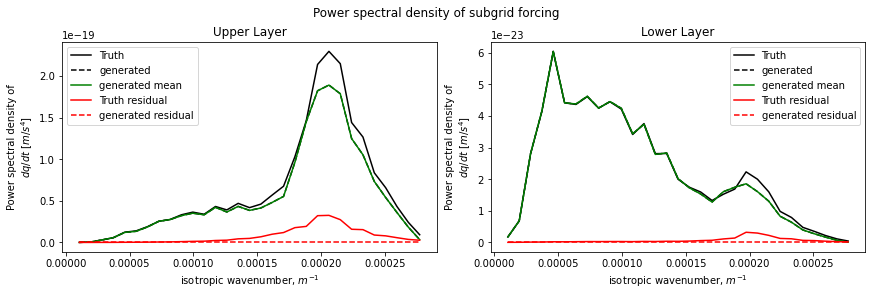

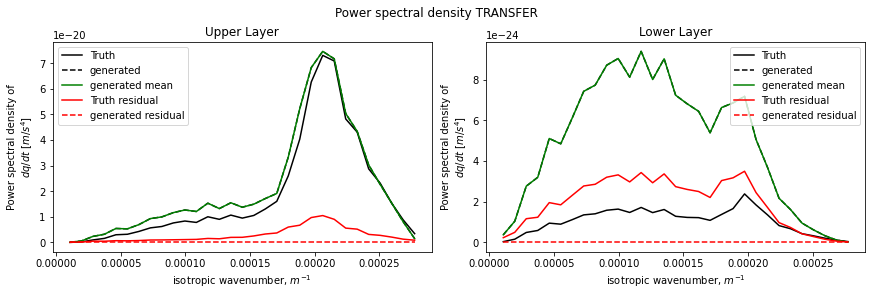

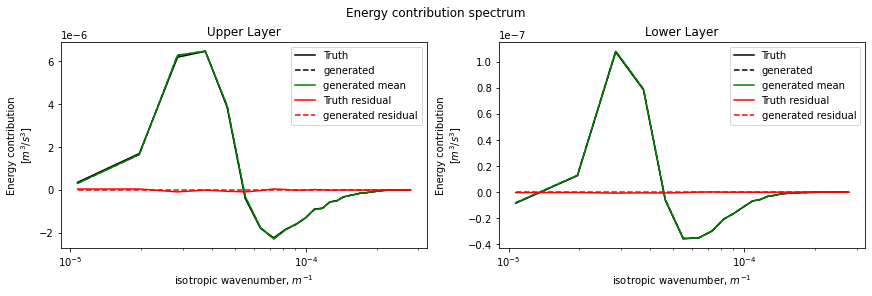

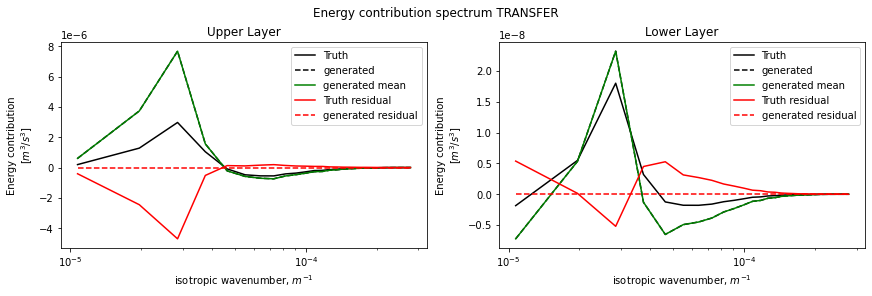

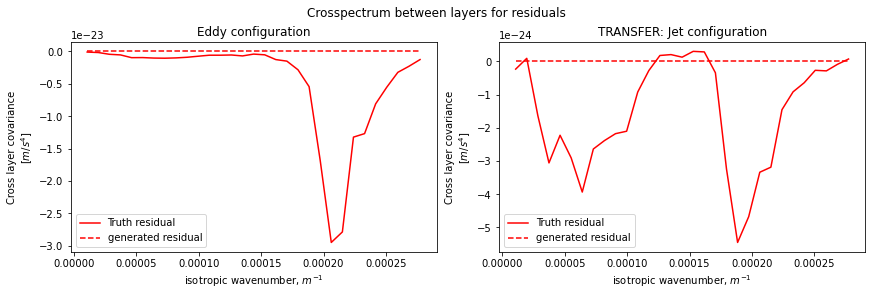

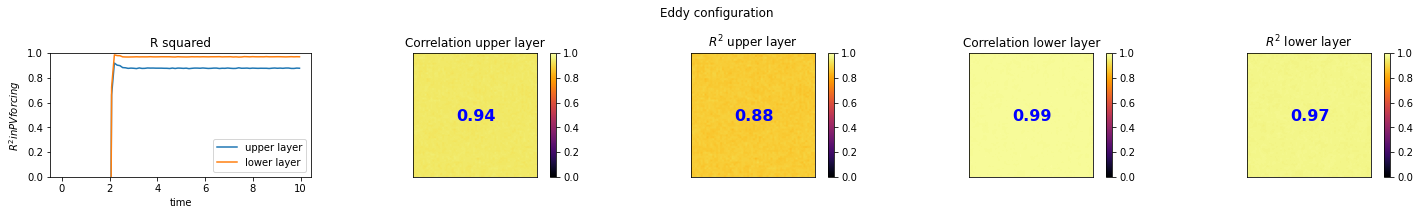

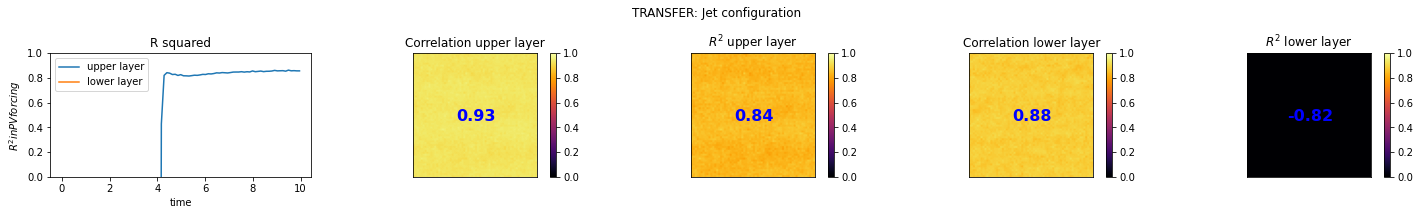

In [4]:
offline_metrics('OLSModel')

Eddy dataset metrics:
R squared in mean prediction: 0.9244829416275024
R squared in power spectrum of subgrid forcing: 0.9848334789276123
R squared in power spectrum of residuals of subgrid forcing: 0.33803921937942505
Jet dataset metrics:
R squared in mean prediction: 0.014373242855072021
R squared in power spectrum of subgrid forcing: -343.8329772949219
R squared in power spectrum of residuals of subgrid forcing: -58.8455810546875


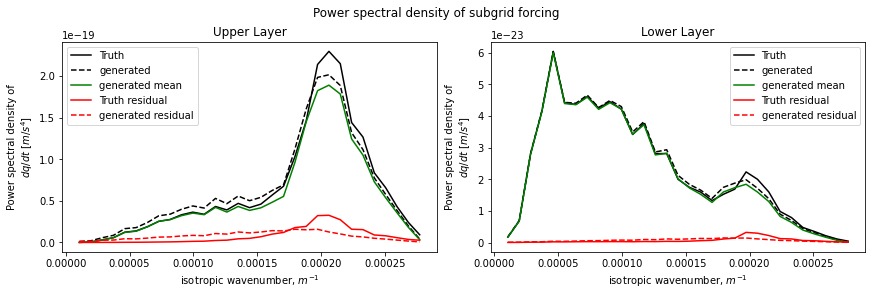

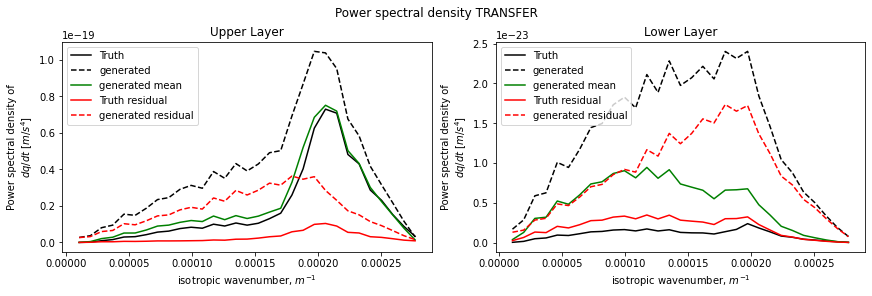

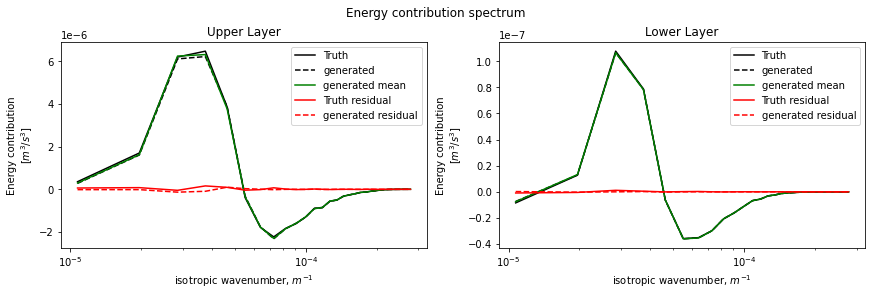

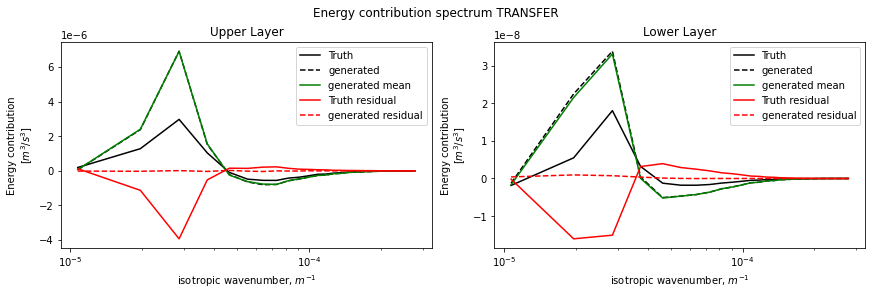

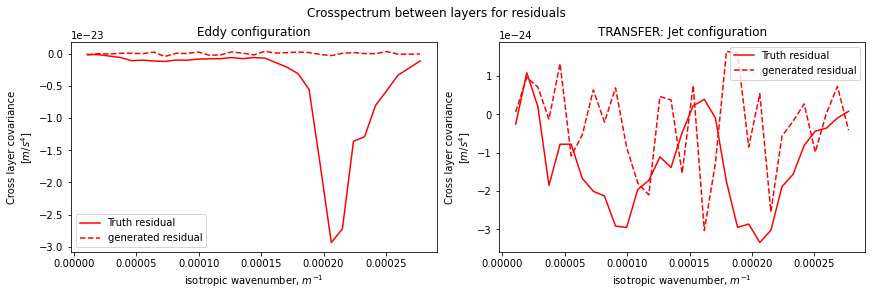

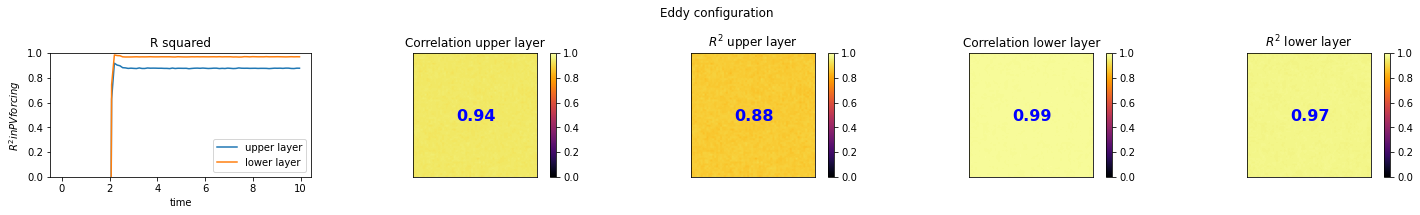

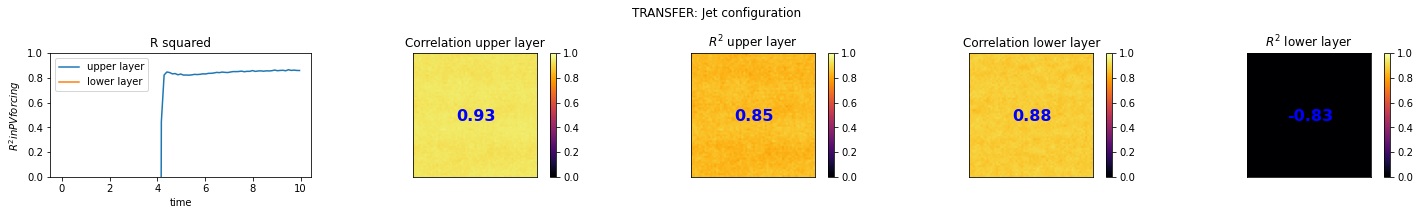

In [5]:
offline_metrics('MeanVarModel_old')

Eddy dataset metrics:
R squared in mean prediction: 0.9249460697174072
R squared in power spectrum of subgrid forcing: 0.9844166040420532
R squared in power spectrum of residuals of subgrid forcing: 0.33455890417099
Jet dataset metrics:
R squared in mean prediction: -0.022200405597686768
R squared in power spectrum of subgrid forcing: -422.4364013671875
R squared in power spectrum of residuals of subgrid forcing: -73.46900177001953


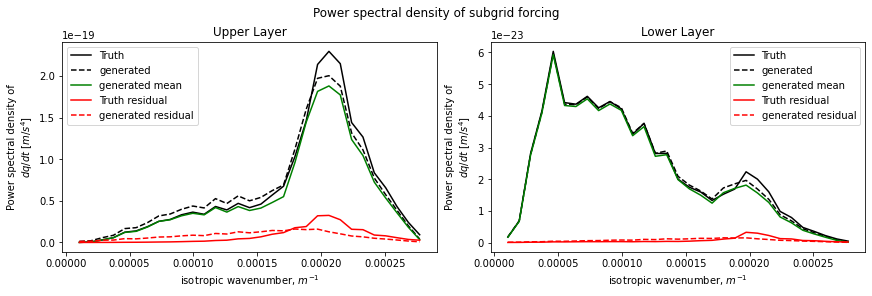

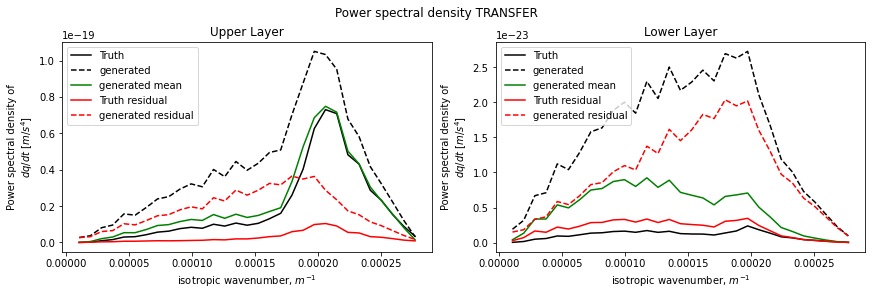

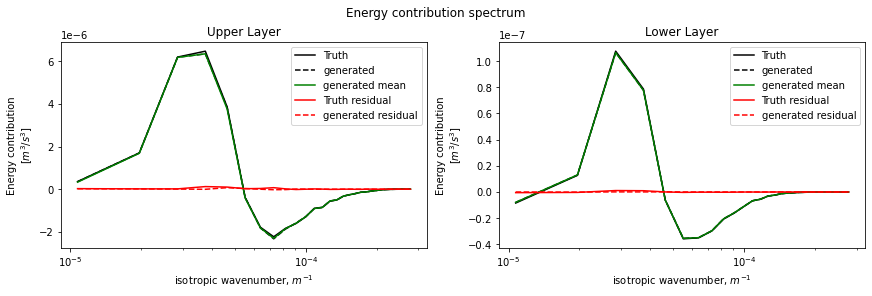

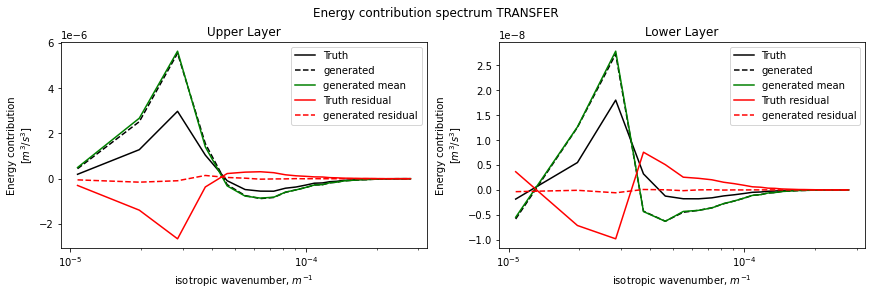

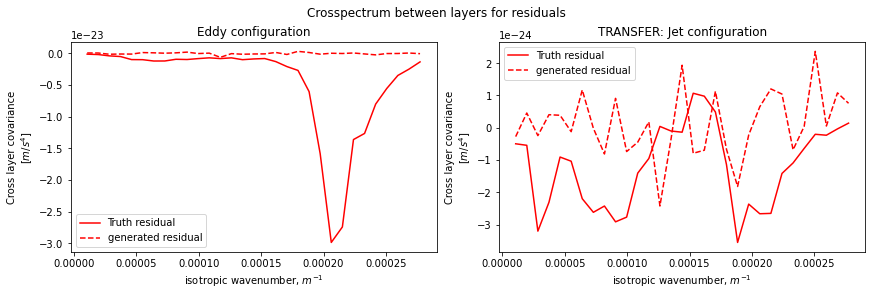

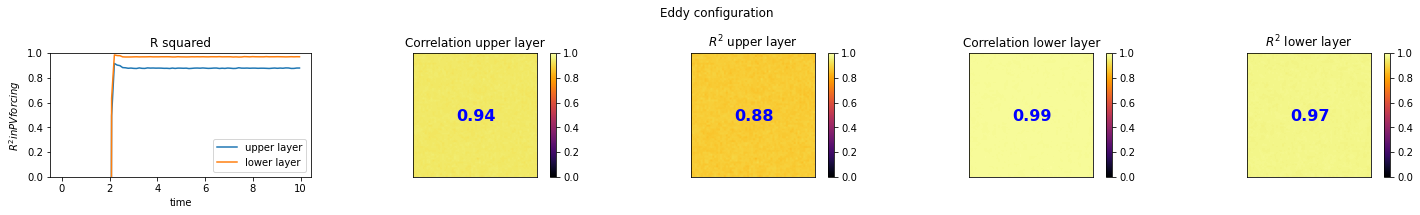

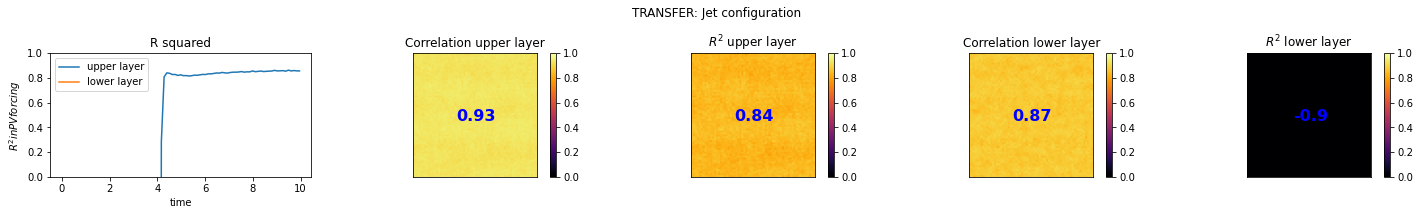

In [6]:
offline_metrics('MeanVarModel')

# Online metrics

In [103]:
def online_metrics(exp, suffix='', folder='/scratch/pp2681/pyqg_generative/'):
    param = xr.open_dataset(os.path.join(folder,exp,f'online_test{suffix}.nc'))
    lowres = xr.open_dataset('/scratch/pp2681/pyqg_generative/lowres/online_test.nc')
    highres = xr.open_dataset('/scratch/pp2681/pyqg_generative/highres/online_eddy.nc')
    downsample = pse.Dataset("/scratch/zanna/data/pyqg/data/test/*.nc").isel(run=slice(0,5))
    KE = 0.5*ave_lev(downsample.u**2+downsample.v**2, 0.25).mean(dim=('x', 'y', 'run'))
    KE['time'] = KE['time'] / 10**9
    x = downsample.q.isel(time=slice(44,None), lev=0).values.ravel()
    points, density = PDF_histogram(x, Nbins=100, xmin=-3e-5, xmax=3e-5)
    pdf_pv = xr.DataArray(density, dims=['pv'],
        coords=[coord(points, 'potential vorticity, $s^{-1}$')],
        attrs=dict(long_name='PDF of upper level PV'))
    
    kr = highres.kr
    dx = pyqg.QGModel(nx=64).dx
    filter_sq = (np.exp(-1/24 * kr**2 * (2*dx)**2))**2
    
    axd = plt.figure(constrained_layout=True, figsize=(14,7)).subplot_mosaic(
    """
    1123
    4567
    """
    )
    
    highres_kw = dict(ls='-', linewidth=3, color='k', label='Highres')
    lowres_kw = dict(ls='-', linewidth=2, color='gray', label='Lowres')
    param_kw = dict(ls='-', linewidth=3, label='Model')
    train_kw = dict(ls='--', linewidth=3, color='g', label='downscale')
    
    ax = axd['1']
    highres.KEspecr.plot(**highres_kw, ax=ax)
    (filter_sq*highres.KEspecr).plot(**train_kw, ax=ax)
    lowres.KEspecr.plot(**lowres_kw, ax=ax)
    param.KEspecr.plot(**param_kw, xscale='log', yscale='log', ax=ax)   
    ax.set_title('KE power spectrum')
    ax.set_ylim([1e-1, 1e+2])
    ax.set_xlim([1e-5, 3e-4])
    ax.legend(ncol=2, loc='lower center')
    ax.grid(which='both')
    
    ax = axd['2']
    highres.KE.plot(**highres_kw, ax=ax)
    KE.plot(**train_kw, ax=ax)
    lowres.KE.plot(**lowres_kw, ax=ax)
    param.KE.plot(**param_kw, ax=ax)
    ax.set_title('Total kinetic energy')
    ax.grid()
    
    ax = axd['3']
    highres.pdf_pv.plot(**highres_kw, ax=ax)
    pdf_pv.plot(**train_kw, ax=ax)
    lowres.pdf_pv.plot(**lowres_kw, ax=ax)
    param.pdf_pv.plot(**param_kw, ax=ax)
    ax.set_title('Upper PV PDF')
    ax.grid()
    
    for j, key in enumerate(['APEgenspecr', 'APEfluxr', 'KEfluxr', 'KEfrictionspecr']):
        ax = axd[str(j+4)]
        highres[key].plot(**highres_kw, ax=ax)
        lowres[key].plot(**lowres_kw, ax=ax)
        (filter_sq*highres[key]).plot(**train_kw, ax=ax)
        
        SGS = None
        if key=='KEfluxr':
            SGS = param['paramspec_KEfluxr']
            out = param['KEfluxr'] + SGS
        elif key=='APEfluxr':
            SGS = param['paramspec_APEfluxr']
            out = param['APEfluxr'] + SGS
        else:
            out = param[key]
        out.plot(**param_kw, xscale='log', ax=ax)
        if SGS is not None:
            SGS.plot(linewidth=2, color='y', label='SGS', ax=ax)
        
        title = dict(APEgenspecr='APE gen.', APEfluxr='APE flux', KEfluxr='KE flux', KEfrictionspecr='Bottom drag')
        ax.grid(which='both')
        ax.set_title(title[key])
        ax.set_xlim([1e-5, 2e-4])
        ax.set_ylim([-3.5e-6, 3.5e-6])
        if j==1:
            ax.legend(ncol=3)

INFO:  Logger initialized


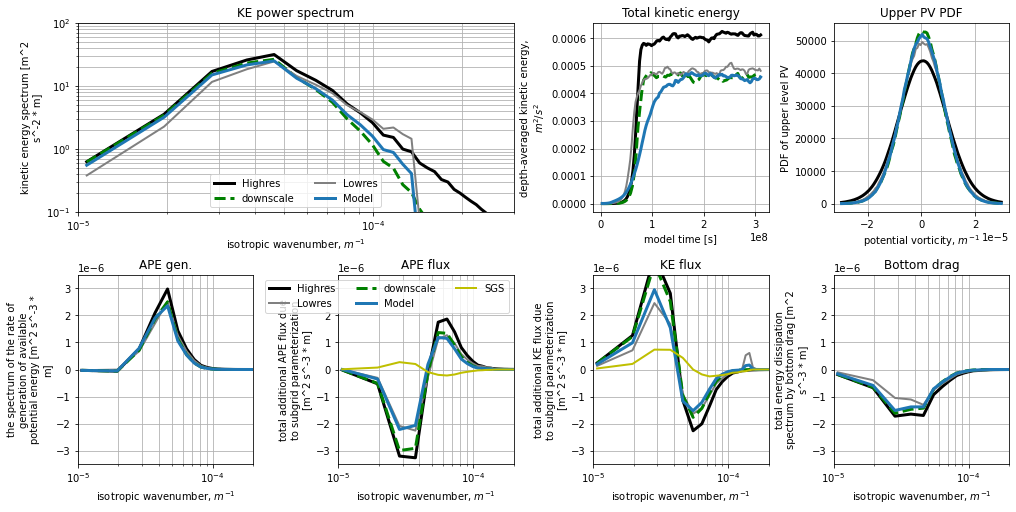

In [104]:
online_metrics('OLSModel')
plt.savefig('OLSModel.pdf')

In [105]:
#online_metrics('MeanVarModel_old', suffix='_AR1_1')

In [106]:
#online_metrics('MeanVarModel_old', suffix='_AR1_48')

INFO:  Logger initialized


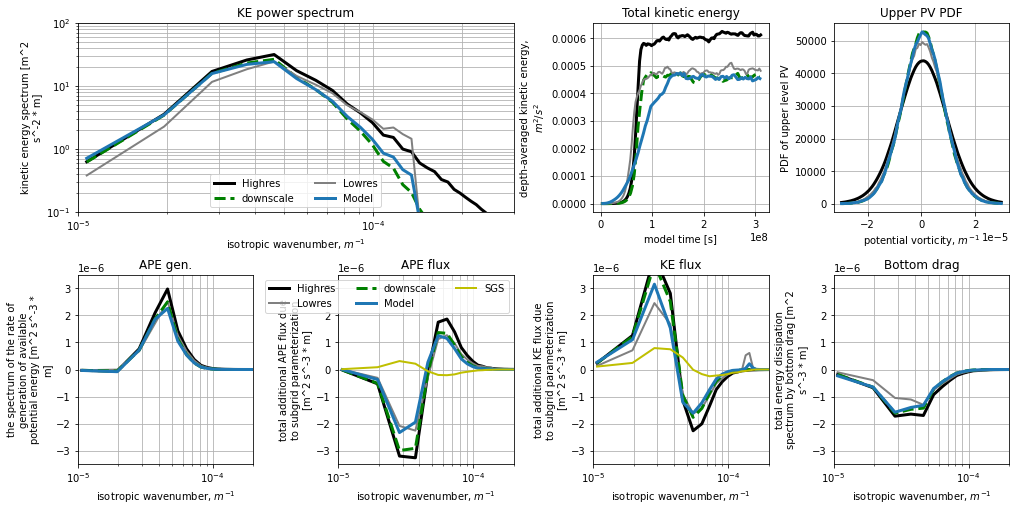

In [107]:
online_metrics('MeanVarModel', suffix='_AR1_12')
plt.savefig('GZ2021_time_AR1_2_days.pdf')

INFO:  Logger initialized


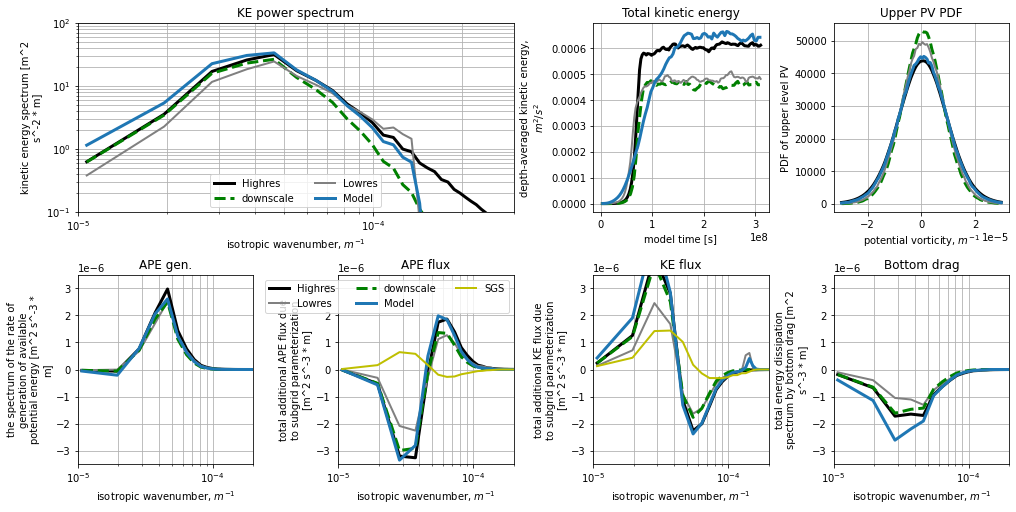

In [108]:
online_metrics('MeanVarModel', suffix='_constant_12')
plt.savefig('GZ2021_time_constant_2_days.pdf')

INFO:  Logger initialized


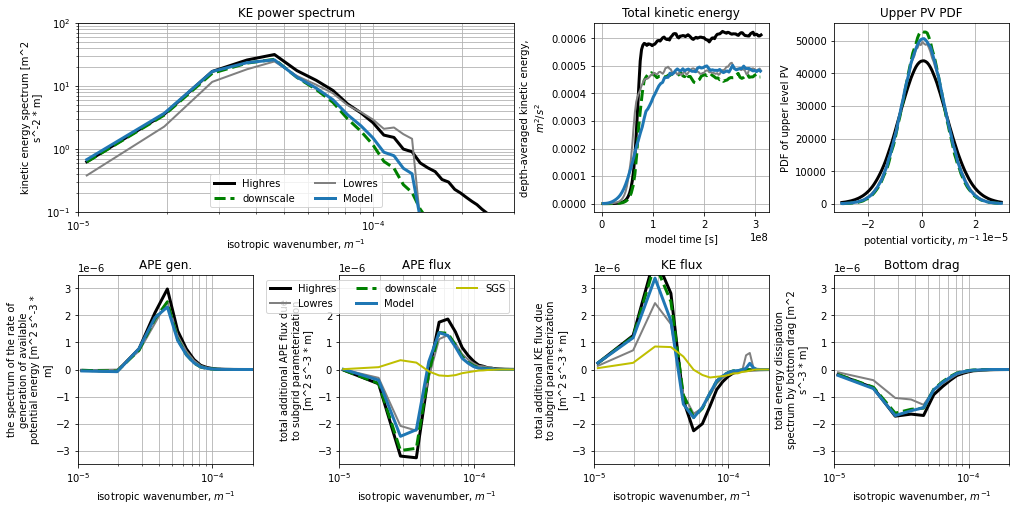

In [109]:
online_metrics('MeanVarModel', suffix='_constant_6')

INFO:  Logger initialized


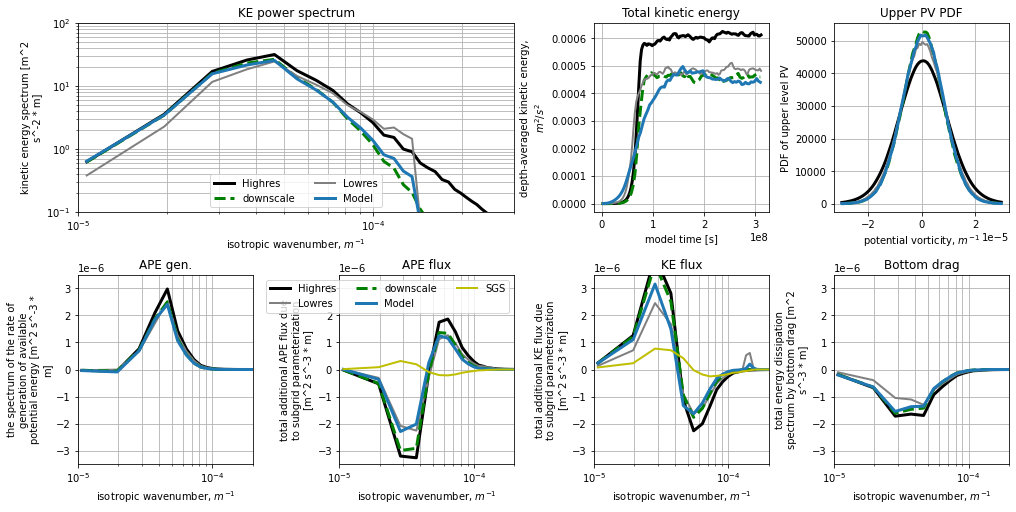

In [110]:
online_metrics('MeanVarModel', suffix='_AR1_6')

# Ensemble metrics

In [280]:
def ensemble_metrics(exp, folder='/scratch/pp2681/pyqg_generative/', time=30, lev=0):
    param = []
    for key in ['_AR1_1', '_AR1_12', '_AR1_24', '_AR1_48']:
        ds = xr.open_dataset(os.path.join(folder,exp, f'ensemble_test{key}.nc'))
        ds['time'] = ds['time'] / 86400
        param.append(ds)
    
    ds = xr.open_dataset('/scratch/pp2681/pyqg_generative/OLSModel/ensemble_test.nc'); ds['time'] = ds['time'] / 86400
    param.append(ds)
    ds = xr.open_dataset('/scratch/pp2681/pyqg_generative/lowres/ensemble_test.nc'); ds['time'] = ds['time'] / 86400
    param.append(ds)
    
    fig = plt.figure(constrained_layout = True, figsize=(14,6))
    
    kw = [0] * 6
    kw[0] = dict(linewidth=3, color='k', label='white noise')
    kw[1] = dict(linewidth=2, label='AR1 12 hours')
    kw[2] = dict(linewidth=2, label='AR1 24 hours')
    kw[3] = dict(linewidth=2, label='AR1 48 hours')
    kw[4] = dict(linewidth=2, label='OLS model')
    kw[5] = dict(linewidth=2, label='lowres model')
    
    for j in range(6):
        plt.subplot(2,3,1)
        param[j].R2_mean.plot(**kw[j])
        plt.legend()
        plt.title('R squared in ensemble mean')
        
        plt.subplot(2,3,2)
        param[j].R2_total.plot(**kw[j])
        plt.title('R squared in spectrum')
        
        plt.subplot(2,3,3)
        param[j].R2_residual.plot(**kw[j])
        plt.title('R squared in residual spectrum')
        
    def plot_sp(p, title):
        p.sp_gen.isel(lev=lev,time=time).plot(ls='--', color='k', label='Stochastic model')
        p.sp_true.isel(lev=lev,time=time).plot(ls='-', color='k', label='Highres model')
        p.sp_gen_res.isel(lev=lev, time=time).plot(ls='--', color='b', label='generated residual')
        p.sp_true_res.isel(lev=lev, time=time).plot(ls='-', color='b', xscale='log', yscale='log', label='true residual')
        plt.title(title)
        plt.ylim([1e-10, 1e-5])
        plt.xlim([1e-5, 3e-4])
        plt.legend()
        
    plt.subplot(2,3,4)
    plot_sp(param[0], 'PV Spectrum at day 60, white noise')
    
    plt.subplot(2,3,5)
    plot_sp(param[1], 'PV Spectrum at day 60, AR1 12 hours')
    
    plt.subplot(2,3,6)
    plot_sp(param[3], 'PV Spectrum at day 60, AR1 48 hours')
    
    def plot_error_growth(p, suptitle):
        fig = plt.figure(figsize=(12,3))
        times = [1, 5, 15, 30, 60, 90]
        plt.subplot(1,2,1)
        for t in times:
            p.sp_true_res.sel(time=t).isel(lev=lev).plot(xscale='log', linewidth=2, label=f'day={str(t)}')
        plt.legend()
        plt.title('Power spectrum of true ensemble spread')
        plt.yscale('log')
        plt.xscale('log')
        plt.ylim([1e-14, 1e-5])
        plt.xlim([1e-5, 3e-4])
        
        plt.subplot(1,2,2)
        for t in times:
            p.sp_gen_res.sel(time=t).isel(lev=lev).plot(xscale='log', linewidth=2, label=f'day={str(t)}')
        plt.legend()
        plt.title('Power spectrum of generated ensemble spread')
        plt.yscale('log')
        plt.xscale('log')
        plt.ylim([1e-14, 1e-5])
        plt.xlim([1e-5, 3e-4])
        plt.suptitle(suptitle, y=1.05)
    
    plot_error_growth(param[0], 'White noise model')
    plot_error_growth(param[1], 'AR1 12 hours model')
    plot_error_growth(param[3], 'AR1 48 hours model')

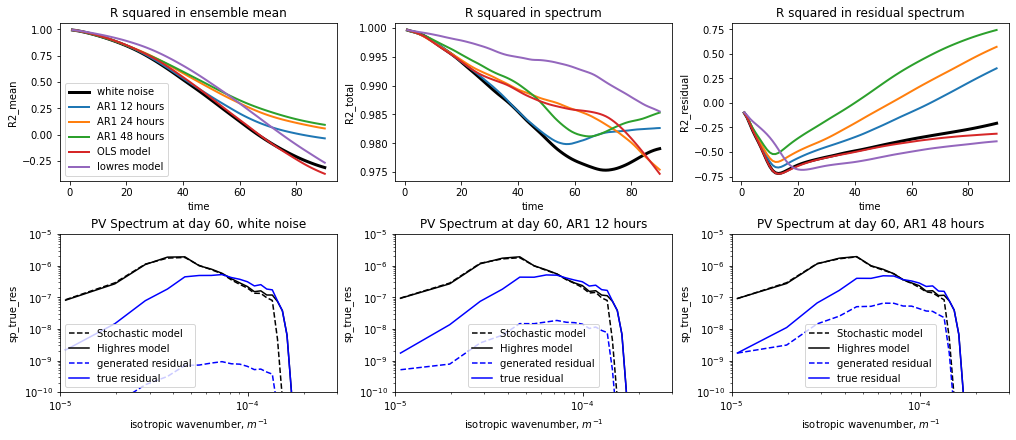

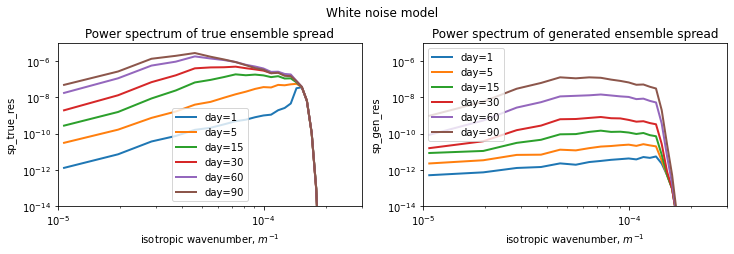

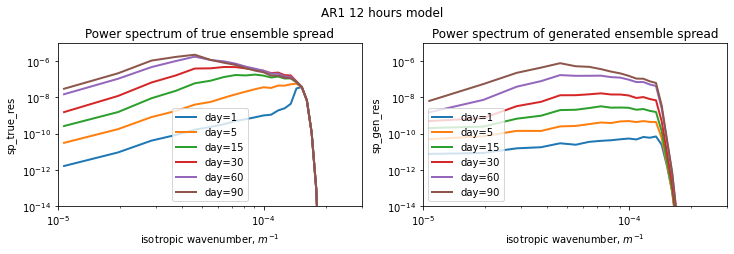

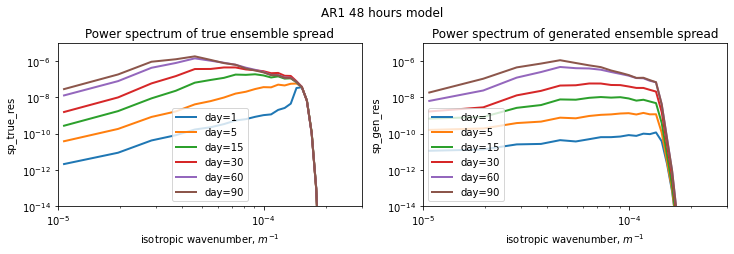

In [281]:
ensemble_metrics('MeanVarModel', lev=0, time=30)